$\newcommand{\si}{\sigma}
\newcommand{\al}{\alpha}
\newcommand{\tta}{\theta}
\newcommand{\Tta}{\Theta}
\newcommand{\Si}{\Sigma}
\newcommand{\ld}{\ldots}
\newcommand{\cd}{\cdots}
\newcommand{\Ga}{\Gamma} 
\newcommand{\bet}{\beta}
\newcommand{\cU}{\mathcal{U}}
\newcommand{\cN}{\mathcal{N}}
\newcommand{\R}{\mathbb{R}}
\newcommand{\p}{\mathbb{P}}
\newcommand{\f}{\frac}
\newcommand{\ff}{\frac{1}}
\newcommand{\ds}{\displaystyle}
\newcommand{\bE}{\mathbf{E}}
\newcommand{\E}{\mathbb{E}}
\newcommand{\bF}{\mathbf{F}}
\newcommand{\ii}{\mathrm{i}}
\newcommand{\me}{\mathrm{e}}
\newcommand{\hsi}{\hat{\sigma}}
\newcommand{\hmu}{\hat{\mu}}
\newcommand{\ste}{\, ;\, }
\newcommand{\op}{\operatorname} 
\newcommand{\argmax}{\op{argmax}}
\newcommand{\lfl}{\lfloor}
\newcommand{\ri}{\right}
\newcommand{\supp}{\operatorname{supp}}$

<a href="https://colab.research.google.com/github/joanglaunes/algosto/blob/master/python/TP_importance_sampling_enonce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Echantillonnage préférentiel (*importance sampling*)


## Exercice 1

On souhaite calculer numériquement l'intégrale 
$$\int_0^{10} e^{-2|x-5|}dx.$$
Une première manière de faire est d'écrire cette intégrale comme 
$$10\E[g(X)]$$
avec $g(x) = e^{-2|x-5|}$ et avec $X$ de loi uniforme sur $[0,10]$. 

1. Utilisez la méthode de Monte-Carlo pour approcher l'intégrale précédente : tirez $N$ réalisations indépendantes $x_1\dots x_N$ d'une loi uniforme sur $[0,10]$ et l'approximation est donnée par 
$$10 \frac 1 N \sum_{i=1}^N e^{-2|x_i-5|}.$$

In [7]:
import numpy as np
import matplotlib.pyplot as plt

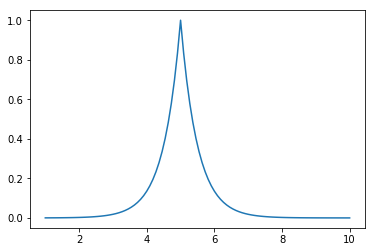

In [8]:
x = np.linspace(1,10,100)
def g(x):
    return np.exp(-2*np.abs(x-5))
plt.plot(x,g(x))

Cependant, la fonction $g$ atteint son maximum en $x=5$ et décroît
rapidement après, il est
donc sans doute plus malin d'utiliser une fonction d'échantillonnage
préférentiel gaussienne $f_Y$ centrée en 5 et de variance 1 (par exemple). On réécrit donc  
$$\int_0^{10} e^{-2|x-5|}dx = \int \mathbf{1}_{[0,10]}(x)
\frac{e^{-2|x-5|}}{\frac{1}{\sqrt{2\pi}}e^{-(x-5)^2/2}}\frac{1}{\sqrt{2\pi}}e^{-(x-5)^2/2}dx
= \E[\frac{g(Y)}{f_Y(Y)}  \mathbf{1}_{[0,10]}(Y)],$$
avec $f_Y(x) = \frac 1 {\sqrt{2\pi} }e^{-(x-5)^2/2} $ et $Y$ de loi gaussienne $\mathcal{N}(5,1)$.

Pour calculer l'intégrale précédente, on tire donc $N$ réalisations indépendantes $x_1\dots x_N$ d'une loi $\mathcal{N}(5,1)$ et l'approximation est donnée par 
$$ \frac 1 N \sum_{i=1}^N \sqrt{2\pi}e^{+(y_i-5)^2/2}e^{-2|y_i-5|} \times \mathbf{1}_{[0,10]}(y_i).$$

2. Utilisez cette nouvelle approche pour calculer l'intégrale et comparer les variances et vitesses de convergence des deux approches. 

## Exercice 2

On souhaite calculer 
$$\int_{-\infty}^{+\infty} x^2 \frac 1 2 e^{-|x|}dx,$$
mais on ne sait pas échantillonner suivant la densité $p(x) = \frac 1 2 e^{-|x|}dx$.

Réécrire cette intégrale à l'aide d'une fonction d'échantillonnage préférentiel gaussienne de $\cN(0,4)$ et estimer sa valeur par une méthode de MOnte-Carlo. 